In [1]:
import os

# Technials Analysis Library
os.chdir("../technicals")
import technicals

# Market Data Connection
os.chdir("../marketdata")
import alpaca

# Machine Learning Model
os.chdir("../ml")
import lstm_model

In [2]:
# Set market data date range 
from datetime import date, datetime, timedelta

end_date  = datetime.now()
start_date  = (end_date - timedelta(days=1000))

start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

print(f"Start date : {start_date}")
print(f"End date : {end_date}")

Start date : 2018-10-17
End date : 2021-07-13


In [3]:
# Load the dataset
test_tickers = ["ADSK"]
ohlcv_df = alpaca.ohlcv(test_tickers, start_date=start_date, end_date=end_date)
tech_ind = technicals.TechnicalAnalysis(ohlcv_df)
df = tech_ind.get_all_technicals(test_tickers[0])
df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,macd,...,ma_50,ma_200,ema_7,ema_14,ema_21,highlow,closeopen,bb_high,bb_low,pvt
time,,,,,,,,,,,,,,,,,,,,,
2018-10-17 00:00:00-04:00,141.1800,142.10,138.7000,141.82,1295773,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,141.820000,141.820000,141.820000,3.4000,0.6400,0.0,0.0,0.000000
2018-10-18 00:00:00-04:00,140.7600,141.45,135.7600,137.28,1793153,0.000000,0.0,0.0,0.0,-0.101859,...,0.0,0.0,139.225714,139.387857,139.441905,5.6900,-3.4800,0.0,0.0,0.000000
2018-10-19 00:00:00-04:00,138.8099,140.43,133.1001,133.18,2883838,0.000000,0.0,0.0,0.0,-0.256929,...,0.0,0.0,136.611351,137.016435,137.152810,7.3299,-5.6299,0.0,0.0,-28725.462394
2018-10-22 00:00:00-04:00,133.9300,137.31,131.4500,135.64,1575925,3.749467,0.0,0.0,0.0,-0.232344,...,0.0,0.0,136.256114,136.595344,136.718949,5.8600,1.7100,0.0,0.0,115237.903532
2018-10-23 00:00:00-04:00,132.6500,136.09,130.1100,134.10,2118996,3.657485,0.0,0.0,0.0,-0.275374,...,0.0,0.0,135.549373,135.944313,136.090883,5.9800,1.4500,0.0,0.0,-53167.488928


In [4]:
model = lstm_model.MachineLearningModel(df)

In [5]:
hist = model.build_model(summary=1, verbose=0)

C:\Users\illya\anaconda3\envs\cu_proj_2\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 90)           38880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 30)           14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 14)                434       
Total params: 61,154
Trainable params: 61,154
Non-trainable params: 0
_________________________________________________________________


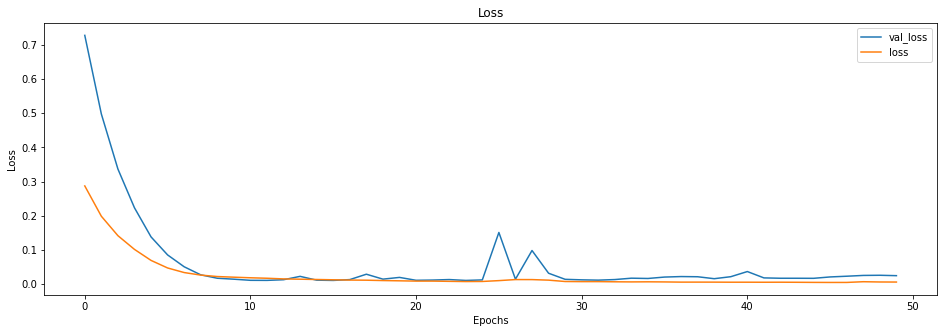

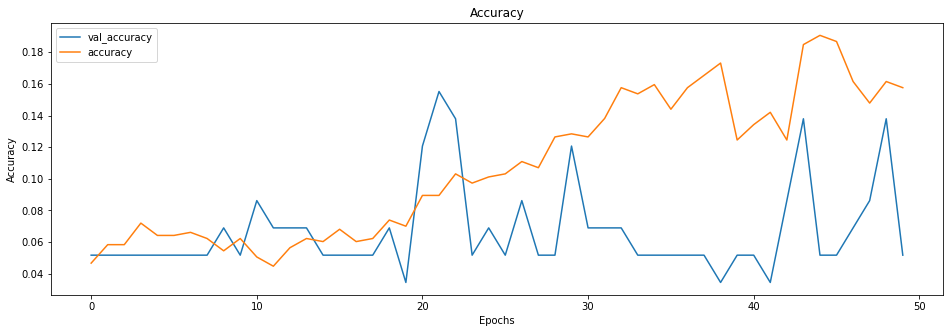

In [6]:
model.visualize_training_results(hist=hist)

In [7]:
model.validate()

Index(['close', 'close2'], dtype='object')


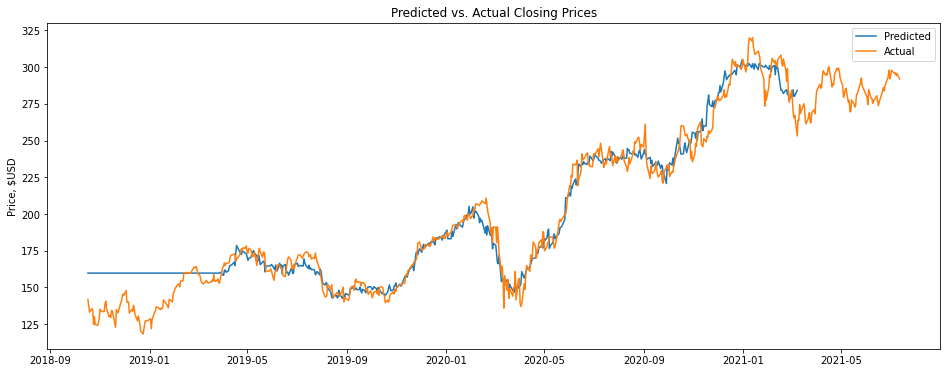

In [8]:
model.visualize_training_price()

In [9]:
print(f"RMS Error : {model.rmse_value}")

RMS Error : 11.778550233065593


In [10]:
model.save_model('test_model')